In [ ]:
import matplotlib.image as image
import matplotlib.pyplot as plt
import numpy as np
import zipfile as zp
import os
import pandas as pd
import torch
from tqdm.notebook import tqdm

from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

In [ ]:
# while True:pass

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Labeling

In [ ]:
# Faces_Dir = '/content/drive/MyDrive/Projekt_Zespołowy/crop_part1' #cropped
Faces_Dir = '/content/drive/MyDrive/Projekt_Zespołowy/UTKFace' #whole

In [ ]:
img_paths =[] #for multiple pictures
age_labels = []
gender_labels =[]

In [ ]:
for filename in tqdm(os.listdir(Faces_Dir)):
  img_path = os.path.join(Faces_Dir, filename)
  tmp = filename.split('_')
  age = int(tmp[0])
  gender = int(tmp[1])

  age_labels.append(age)
  gender_labels.append(gender)
  img_paths.append(img_path)

  0%|          | 0/23748 [00:00<?, ?it/s]

In [ ]:
data_frame = pd.DataFrame()
data_frame['image'], data_frame['age'], data_frame['gender']= img_paths, age_labels, gender_labels

In [ ]:
data_frame.head

<bound method NDFrame.head of                                                    image  age  gender
0      /content/drive/MyDrive/Projekt_Zespołowy/UTKFa...   65       0
1      /content/drive/MyDrive/Projekt_Zespołowy/UTKFa...    6       0
2      /content/drive/MyDrive/Projekt_Zespołowy/UTKFa...   85       1
3      /content/drive/MyDrive/Projekt_Zespołowy/UTKFa...   65       1
4      /content/drive/MyDrive/Projekt_Zespołowy/UTKFa...   65       1
...                                                  ...  ...     ...
23743  /content/drive/MyDrive/Projekt_Zespołowy/UTKFa...   15       1
23744  /content/drive/MyDrive/Projekt_Zespołowy/UTKFa...   12       0
23745  /content/drive/MyDrive/Projekt_Zespołowy/UTKFa...   10       1
23746  /content/drive/MyDrive/Projekt_Zespołowy/UTKFa...   15       0
23747  /content/drive/MyDrive/Projekt_Zespołowy/UTKFa...   15       0

[23748 rows x 3 columns]>

In [ ]:
from torch.utils import data
#maping gender labels
gender_dictionary = {0:'Male', 1:'Female'}

# Data INFO :)

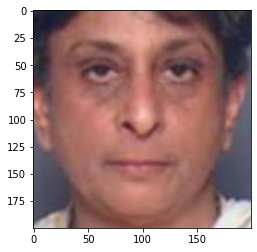

In [ ]:
from PIL import Image
ex_image = Image.open(data_frame['image'][6840])
plt.imshow(ex_image)

Cell for testing:

(200, 200)

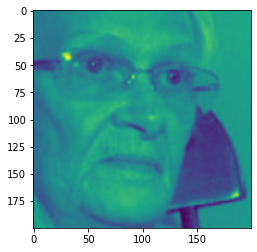

In [ ]:
#image importing using torchvision

#reading images as greyscale torch tensor
ex_im = torchvision.io.read_image(data_frame['image'][1000],
                                  torchvision.io.ImageReadMode.GRAY)
ex_im.reshape(200,200).shape
im = np.array(ex_im)
im = im.reshape(200,200)
plt.imshow(im)

ex1_im = Image.open((data_frame['image'][1000]))
ex1_im = np.array(ex1_im).mean(axis=2)
ex1_im.shape

# Sets creation

In [ ]:
def images_featuring(images):
  features = []
  for num in tqdm(range(images.size)):
    img = torchvision.io.read_image(images[num],
                                    torchvision.io.ImageReadMode.GRAY)
    img = img.reshape((200, 200), 1)
    img = img.numpy()
    features.append(img)
  features = np.array(features)
  features = features.reshape(len(features), 200, 200, 1)

  return features

In [ ]:
X = images_featuring(data_frame['image'])

  0%|          | 0/23748 [00:00<?, ?it/s]

In [ ]:
#normalizing pix. to 0-1
X = X/255.0

In [ ]:
# change of view
X = torch.Tensor(X).to(device).view(-1,200,200)

Gdy mamy pobrane X jako np.array:

In [ ]:
#selecting device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
## wczytanie tensora z google drive dla UTKFace
# torch.save(X, 'X2.pt')
# X = torch.load('/content/drive/MyDrive/Projekt_Zespołowy/X2.pt')
# X.size()
# X = np.array(X.cpu())

In [ ]:
X = np.load("/content/drive/MyDrive/Projekt_Zespołowy/X_np.npy")

In [ ]:
# Przekształcenie np.array do tensora
X = torch.Tensor(X)
X[0]

tensor([[0.8588, 0.8588, 0.8588,  ..., 0.6196, 0.6196, 0.6275],
        [0.8588, 0.8588, 0.8588,  ..., 0.6157, 0.6157, 0.6157],
        [0.8588, 0.8588, 0.8588,  ..., 0.6157, 0.6078, 0.6078],
        ...,
        [0.4902, 0.4667, 0.4392,  ..., 0.7529, 0.7882, 0.7961],
        [0.4863, 0.4627, 0.4314,  ..., 0.7020, 0.7725, 0.8039],
        [0.4784, 0.4588, 0.4275,  ..., 0.6510, 0.7490, 0.7961]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


dtype('int64')

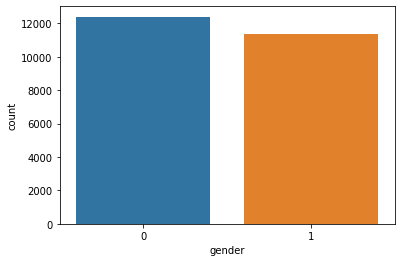

In [ ]:
y_gender = np.array(data_frame['gender'])

y_age = np.array(data_frame['age'])

import seaborn as sns
sns.countplot(data_frame['gender'])
y_gender.dtype

# **Gender Estimation**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_gender,
                                                    test_size = 0.2,
                                                    random_state = 4)
y_train[:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0])

In [ ]:
y_train_hot = []

for i in y_train:
  y_train_hot.append(np.eye(2)[i])

y_train_hot[:10]

[array([0., 1.]),
 array([1., 0.]),
 array([1., 0.]),
 array([0., 1.]),
 array([1., 0.]),
 array([1., 0.]),
 array([0., 1.]),
 array([0., 1.]),
 array([1., 0.]),
 array([1., 0.])]

In [ ]:
#model class for gender prediction
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 20, 3, 1)
        self.conv2 = nn.Conv2d(20, 40, 3, 1)
        self.conv3 = nn.Conv2d(40, 50, 3, 1)
        self.fc1 = nn.Linear(23*23*50, 600) #(((((200-2)/2)-2))/2)-2))/2) = 23,..
        self.fc2 = nn.Linear(600, 100)
        self.fc3 = nn.Linear(100,2)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv3(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 23*23*50)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.sigmoid(X)
        #softmax(X, dim=1)

In [ ]:
model = ConvolutionalNetwork().to(device)
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 20, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(40, 50, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=26450, out_features=600, bias=True)
  (fc2): Linear(in_features=600, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=2, bias=True)
)

In [ ]:
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## *Train* and *Test*

In [ ]:
def get_accuracy(model, X_test, y_test):
  correct = 0
  total = 0
  with torch.no_grad():
      for i in range(len(X_test)):
          real_class = y_test[i]
          net_out = model(X_test[i].to(device).view(-1, 1, 200, 200))[0]  # returns a list, 
          predicted_class = torch.argmax(net_out)

          if predicted_class == real_class:
              correct += 1
          total += 1
  return round(correct/total, 3)

In [ ]:
BATCH_SIZE = 40
EPOCHS = 100
MODELPATH = "/content/drive/MyDrive/Projekt_Zespołowy/model.pth"

y_train_hot = torch.Tensor(y_train_hot)

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(X_train), BATCH_SIZE)): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
        batch_X = X_train[i:i+BATCH_SIZE].view(-1, 1, 200, 200).to(device)
        batch_y = y_train_hot[i:i+BATCH_SIZE].to(device)

        model.zero_grad()

        outputs = model(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()    # Does the update

    acc = get_accuracy(model, X_test, y_test)
    print(f"Epoch: {epoch+1}. Loss: {loss}. Accuracy: {acc}")
    
    #saving model each epoch
    device = torch.device("cuda")
    model.to(device)
    torch.save(model.state_dict(), MODELPATH)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  """


  0%|          | 0/475 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 1. Loss: 0.32304853200912476. Accuracy: 0.843


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 2. Loss: 0.19118264317512512. Accuracy: 0.867


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 3. Loss: 0.2000727355480194. Accuracy: 0.87


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 4. Loss: 0.20473414659500122. Accuracy: 0.871


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 5. Loss: 0.19296908378601074. Accuracy: 0.87


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 6. Loss: 0.2854442894458771. Accuracy: 0.867


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 7. Loss: 0.2182920128107071. Accuracy: 0.868


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 8. Loss: 0.1301039606332779. Accuracy: 0.865


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 9. Loss: 0.15601998567581177. Accuracy: 0.861


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 10. Loss: 0.09413976222276688. Accuracy: 0.864


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 11. Loss: 0.025005491450428963. Accuracy: 0.87


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 12. Loss: 0.0723341554403305. Accuracy: 0.87


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 13. Loss: 0.04084695503115654. Accuracy: 0.872


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 14. Loss: 0.01763438805937767. Accuracy: 0.875


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 15. Loss: 0.11977934837341309. Accuracy: 0.868


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 16. Loss: 0.10823754221200943. Accuracy: 0.861


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 17. Loss: 0.0020037745125591755. Accuracy: 0.868


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 18. Loss: 0.012068278156220913. Accuracy: 0.876


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 19. Loss: 0.03564281389117241. Accuracy: 0.873


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 20. Loss: 0.0024892515502870083. Accuracy: 0.88


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 21. Loss: 0.024677734822034836. Accuracy: 0.873


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 22. Loss: 0.055067095905542374. Accuracy: 0.869


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 23. Loss: 0.07604207843542099. Accuracy: 0.88


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 24. Loss: 0.02944725751876831. Accuracy: 0.873


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 25. Loss: 0.02209809608757496. Accuracy: 0.876


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 26. Loss: 0.035907991230487823. Accuracy: 0.869


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 27. Loss: 0.17635375261306763. Accuracy: 0.866


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 28. Loss: 0.017374908551573753. Accuracy: 0.875


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 29. Loss: 0.00048228903324343264. Accuracy: 0.873


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 30. Loss: 0.019385822117328644. Accuracy: 0.875


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 31. Loss: 0.002384911058470607. Accuracy: 0.877


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 32. Loss: 0.0084571223706007. Accuracy: 0.874


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 33. Loss: 0.05528446286916733. Accuracy: 0.878


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 34. Loss: 0.0037994079757481813. Accuracy: 0.876


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 35. Loss: 0.0023298803716897964. Accuracy: 0.877


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 36. Loss: 0.0023290805984288454. Accuracy: 0.863


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 37. Loss: 0.0006039933068677783. Accuracy: 0.876


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 38. Loss: 0.0012170177651569247. Accuracy: 0.871


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 39. Loss: 0.011678648181259632. Accuracy: 0.875


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 40. Loss: 0.04631604254245758. Accuracy: 0.878


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 41. Loss: 0.01999870501458645. Accuracy: 0.881


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 42. Loss: 0.020829029381275177. Accuracy: 0.875


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 43. Loss: 0.01090098638087511. Accuracy: 0.885


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 44. Loss: 0.03671414777636528. Accuracy: 0.868


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 45. Loss: 0.022133322432637215. Accuracy: 0.884


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 46. Loss: 0.021493546664714813. Accuracy: 0.874


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 47. Loss: 0.044358666986227036. Accuracy: 0.88


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 48. Loss: 0.01956211030483246. Accuracy: 0.876


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 49. Loss: 0.023973971605300903. Accuracy: 0.882


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 50. Loss: 0.04647647589445114. Accuracy: 0.881


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 51. Loss: 0.020776091143488884. Accuracy: 0.879


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 52. Loss: 0.019759973511099815. Accuracy: 0.879


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 53. Loss: 0.031094642356038094. Accuracy: 0.884


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 54. Loss: 0.020440591499209404. Accuracy: 0.879


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 55. Loss: 0.02032659761607647. Accuracy: 0.884


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 56. Loss: 0.03235077112913132. Accuracy: 0.877


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 57. Loss: 0.023086439818143845. Accuracy: 0.876


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 58. Loss: 0.01972196437418461. Accuracy: 0.877


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 59. Loss: 0.024005813524127007. Accuracy: 0.873


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 60. Loss: 0.021046051755547523. Accuracy: 0.877


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 61. Loss: 0.01949852891266346. Accuracy: 0.882


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 62. Loss: 0.16896387934684753. Accuracy: 0.879


  0%|          | 0/475 [00:00<?, ?it/s]

Epoch: 63. Loss: 0.02299485169351101. Accuracy: 0.881


  0%|          | 0/475 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

# **Age Estimation**

In [ ]:
age_dictionary = {0:'(8-15>', 1:'(15-20>', 2:'(20-30>', 3:'(30-40>', 4:'(40-55>', 5:'(55-65>', 6:'(65-..'}

In [ ]:
from math import tan
#Setting age ranges
# 8-15, 15-20, 20-30, 30-40, 40-55, 55-65, 65-..
y_age_range = y_age
count = 0

count_inx_0 = 0
count_inx_1 = 0
count_inx_2 = 0
count_inx_3 = 0
count_inx_4 = 0
count_inx_5 = 0
count_inx_6 = 0

limit = 900

for idx, age in np.ndenumerate(y_age_range):
  if age <= 8:
    y_age_range[idx] = -1
    count += 1

  elif age > 8 and age <= 15:
    count_inx_0 += 1
    if count_inx_0 < limit:
      y_age_range[idx] = 0
    else:
      y_age_range[idx] = -1

  elif age > 15 and age <= 20:
    count_inx_1 += 1
    if count_inx_1 < limit:
      y_age_range[idx] = 1
    else:
      y_age_range[idx] = -1

  elif age > 20 and age <= 30:
    count_inx_2 += 1
    if count_inx_2 < limit:
      y_age_range[idx] = 2
    else:
      y_age_range[idx] = -1

  elif age > 30 and age <= 40:
    count_inx_3 += 1
    if count_inx_3 < limit:
      y_age_range[idx] = 3
    else:
      y_age_range[idx] = -1

  elif age > 40 and age <= 55:
    count_inx_4 += 1
    if count_inx_4 < limit:
      y_age_range[idx] = 4
    else:
      y_age_range[idx] = -1

  elif age > 55 and age <= 65:
    count_inx_5 += 1
    if count_inx_5 < limit:
      y_age_range[idx] = 5
    else:
      y_age_range[idx] = -1

  elif age > 65:
    count_inx_6 += 1
    if count_inx_6 < limit:
      y_age_range[idx] = 6
    else:
      y_age_range[idx] = -1

count

2904

In [ ]:
#usuwanie wieku z indx = -1 ->(0-8)
y_age_range_ = y_age_range
indexes_out = []
a = 0
for idx, num in np.ndenumerate(y_age_range_):
  if num == -1:
    indexes_out.append(idx)
len(indexes_out)

17455

In [ ]:
#usuwanie indeksów z y
y_age_no_out = np.delete(y_age_range_, indexes_out)

In [ ]:
#usuwanie tych samych indeksów z x
X_ = X
X_no_out = np.delete(X_, indexes_out, 0)
X_no_out.shape

torch.Size([6293, 200, 200])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


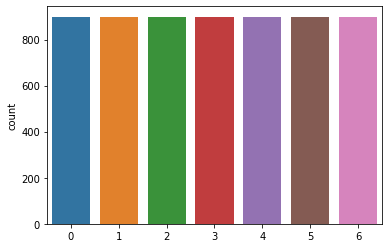

In [ ]:
import seaborn as sns
sns.countplot(y_age_no_out)

In [ ]:
# Zwolnienie pamięci zaalokowej dla X
import gc
del(X)
gc.collect()

88

In [ ]:
Xage_train, Xage_test, yage_train, yage_test = train_test_split(X_no_out, y_age_no_out,
                                                    test_size = 0.2,
                                                    random_state = 4)
yage_train[:10]

array([5, 3, 5, 6, 2, 5, 2, 5, 2, 2])

In [ ]:
# Zwolnienie pamięci zaalokowej dla X_no_out
import gc
del(X_no_out)
gc.collect()

176

In [ ]:
#one hot encoding for age groups
yage_train_hot = []

for i in yage_train:
  yage_train_hot.append(np.eye(7)[i])

yage_train_hot[:10]

[array([0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.])]

In [ ]:
#model class for age prediction
class ConvolutionalNetwork_age(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,  50, 3, 1)
        self.conv2 = nn.Conv2d(50, 100, 3, 1)
        self.conv3 = nn.Conv2d(100, 150, 3, 1)
        self.conv4 = nn.Conv2d(150, 200, 3, 1)
        self.fc1 = nn.Linear(10*10*200, 3000) #(((((200-2)/2)-2))/2)-2))/2) = 23,.. (4->10)
        self.fc2 = nn.Linear(3000, 300)
        self.fc3 = nn.Linear(300,7) #7-liczba klas wieków

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv3(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv4(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 10*10*200)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.softmax(X, dim=1)

In [ ]:
model_age = ConvolutionalNetwork_age().to(device)
model_age

ConvolutionalNetwork_age(
  (conv1): Conv2d(1, 50, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(50, 100, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(100, 150, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(150, 200, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=20000, out_features=3000, bias=True)
  (fc2): Linear(in_features=3000, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=7, bias=True)
)

In [ ]:
loss_function_age = nn.CrossEntropyLoss()
optimizer_age = torch.optim.Adam(model_age.parameters(), lr=0.001)

## Train and test

In [ ]:
BATCH_SIZE = 80
EPOCHS = 200
MODELPATHAGE = "/content/drive/MyDrive/Projekt_Zespołowy/model_age.pth"

targets = []
preds = []

best_accuracy = 0.0
yage_train_hot = torch.Tensor(yage_train_hot)

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(Xage_train), BATCH_SIZE)): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
        batch_Xage = Xage_train[i:i+BATCH_SIZE].view(-1, 1, 200, 200).to(device)
        batch_yage = yage_train_hot[i:i+BATCH_SIZE].to(device)
        model_age.zero_grad()

        outputs_age = model_age(batch_Xage)
        loss = loss_function_age(outputs_age, batch_yage)
        loss.backward()
        optimizer_age.step()    # Does the update
    
    acc = get_accuracy(model_age, Xage_test, yage_test)
    print(f"Epoch: {epoch+1}. Loss: {loss}. Accuracy: {acc}")

    if acc > best_accuracy:
      best_accuracy = acc
      model_age.to(device)
      torch.save(model_age.state_dict(), MODELPATHAGE)

    print(best_accuracy)

  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 1. Loss: 1.9130651950836182. Accuracy: 0.253
0.253


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 2. Loss: 1.9216820001602173. Accuracy: 0.301
0.301


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 3. Loss: 1.883253812789917. Accuracy: 0.336
0.336


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 4. Loss: 1.851097822189331. Accuracy: 0.375
0.375


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 5. Loss: 1.8159023523330688. Accuracy: 0.362
0.375


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 6. Loss: 1.8243978023529053. Accuracy: 0.357
0.375


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 7. Loss: 1.782362937927246. Accuracy: 0.38
0.38


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 8. Loss: 1.8000818490982056. Accuracy: 0.361
0.38


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 9. Loss: 1.7980437278747559. Accuracy: 0.389
0.389


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 10. Loss: 1.7692855596542358. Accuracy: 0.38
0.389


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 11. Loss: 1.8105216026306152. Accuracy: 0.384
0.389


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 12. Loss: 1.7781646251678467. Accuracy: 0.384
0.389


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 13. Loss: 1.7703404426574707. Accuracy: 0.396
0.396


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 14. Loss: 1.75381600856781. Accuracy: 0.392
0.396


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 15. Loss: 1.7321722507476807. Accuracy: 0.416
0.416


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 16. Loss: 1.694764494895935. Accuracy: 0.415
0.416


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 17. Loss: 1.6446303129196167. Accuracy: 0.405
0.416


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 18. Loss: 1.6381827592849731. Accuracy: 0.414
0.416


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 19. Loss: 1.6133928298950195. Accuracy: 0.438
0.438


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 20. Loss: 1.6805408000946045. Accuracy: 0.427
0.438


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 21. Loss: 1.6441707611083984. Accuracy: 0.423
0.438


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 22. Loss: 1.5815781354904175. Accuracy: 0.431
0.438


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 23. Loss: 1.5354160070419312. Accuracy: 0.424
0.438


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 24. Loss: 1.5855437517166138. Accuracy: 0.421
0.438


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 25. Loss: 1.5366103649139404. Accuracy: 0.431
0.438


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 26. Loss: 1.5198957920074463. Accuracy: 0.43
0.438


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 27. Loss: 1.5071051120758057. Accuracy: 0.419
0.438


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 28. Loss: 1.5519376993179321. Accuracy: 0.444
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 29. Loss: 1.5999780893325806. Accuracy: 0.402
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 30. Loss: 1.516038417816162. Accuracy: 0.414
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 31. Loss: 1.4718565940856934. Accuracy: 0.438
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 32. Loss: 1.5048412084579468. Accuracy: 0.415
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 33. Loss: 1.4946424961090088. Accuracy: 0.422
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 34. Loss: 1.4546644687652588. Accuracy: 0.43
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 35. Loss: 1.4642255306243896. Accuracy: 0.419
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 36. Loss: 1.450181484222412. Accuracy: 0.429
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 37. Loss: 1.475112795829773. Accuracy: 0.412
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 38. Loss: 1.4228451251983643. Accuracy: 0.431
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 39. Loss: 1.4646728038787842. Accuracy: 0.415
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 40. Loss: 1.456196665763855. Accuracy: 0.426
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 41. Loss: 1.4888557195663452. Accuracy: 0.431
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 42. Loss: 1.4159109592437744. Accuracy: 0.433
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 43. Loss: 1.4292153120040894. Accuracy: 0.421
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 44. Loss: 1.4364265203475952. Accuracy: 0.424
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 45. Loss: 1.4251939058303833. Accuracy: 0.44
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 46. Loss: 1.4341017007827759. Accuracy: 0.425
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 47. Loss: 1.413955569267273. Accuracy: 0.435
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 48. Loss: 1.3956563472747803. Accuracy: 0.432
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 49. Loss: 1.4128752946853638. Accuracy: 0.41
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 50. Loss: 1.3972458839416504. Accuracy: 0.427
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 51. Loss: 1.4359084367752075. Accuracy: 0.44
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 52. Loss: 1.434085488319397. Accuracy: 0.423
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 53. Loss: 1.4354075193405151. Accuracy: 0.436
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 54. Loss: 1.4075353145599365. Accuracy: 0.423
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 55. Loss: 1.4271578788757324. Accuracy: 0.419
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 56. Loss: 1.4083811044692993. Accuracy: 0.431
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 57. Loss: 1.4211524724960327. Accuracy: 0.43
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 58. Loss: 1.4454442262649536. Accuracy: 0.426
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 59. Loss: 1.4137541055679321. Accuracy: 0.425
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 60. Loss: 1.4363216161727905. Accuracy: 0.431
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 61. Loss: 1.439409852027893. Accuracy: 0.422
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 62. Loss: 1.428969144821167. Accuracy: 0.423
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 63. Loss: 1.390146255493164. Accuracy: 0.434
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 64. Loss: 1.4235235452651978. Accuracy: 0.414
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 65. Loss: 1.3950164318084717. Accuracy: 0.421
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 66. Loss: 1.3812040090560913. Accuracy: 0.425
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 67. Loss: 1.3869316577911377. Accuracy: 0.419
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 68. Loss: 1.4375616312026978. Accuracy: 0.403
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 69. Loss: 1.4246768951416016. Accuracy: 0.427
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 70. Loss: 1.393475890159607. Accuracy: 0.412
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 71. Loss: 1.4151567220687866. Accuracy: 0.422
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 72. Loss: 1.3843817710876465. Accuracy: 0.425
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 73. Loss: 1.381722092628479. Accuracy: 0.431
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 74. Loss: 1.414519190788269. Accuracy: 0.418
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 75. Loss: 1.4356179237365723. Accuracy: 0.411
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 76. Loss: 1.3941214084625244. Accuracy: 0.418
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 77. Loss: 1.4106106758117676. Accuracy: 0.429
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 78. Loss: 1.4242665767669678. Accuracy: 0.422
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 79. Loss: 1.398943543434143. Accuracy: 0.408
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 80. Loss: 1.4341075420379639. Accuracy: 0.412
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 81. Loss: 1.3939626216888428. Accuracy: 0.43
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 82. Loss: 1.3950954675674438. Accuracy: 0.404
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 83. Loss: 1.428664207458496. Accuracy: 0.393
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 84. Loss: 1.42010498046875. Accuracy: 0.419
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 85. Loss: 1.3896101713180542. Accuracy: 0.422
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 86. Loss: 1.3689894676208496. Accuracy: 0.424
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 87. Loss: 1.3815561532974243. Accuracy: 0.426
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 88. Loss: 1.4443427324295044. Accuracy: 0.411
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 89. Loss: 1.3965600728988647. Accuracy: 0.415
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 90. Loss: 1.3938618898391724. Accuracy: 0.438
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 91. Loss: 1.4076941013336182. Accuracy: 0.415
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 92. Loss: 1.3817225694656372. Accuracy: 0.423
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 93. Loss: 1.3810522556304932. Accuracy: 0.423
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 94. Loss: 1.3995697498321533. Accuracy: 0.416
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 95. Loss: 1.400406002998352. Accuracy: 0.437
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 96. Loss: 1.380832552909851. Accuracy: 0.429
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 97. Loss: 1.368308186531067. Accuracy: 0.43
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 98. Loss: 1.3922125101089478. Accuracy: 0.41
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 99. Loss: 1.3732550144195557. Accuracy: 0.427
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 100. Loss: 1.3682875633239746. Accuracy: 0.436
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 101. Loss: 1.3561841249465942. Accuracy: 0.434
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 102. Loss: 1.389556884765625. Accuracy: 0.421
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 103. Loss: 1.342423677444458. Accuracy: 0.427
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 104. Loss: 1.3528587818145752. Accuracy: 0.42
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 105. Loss: 1.3811026811599731. Accuracy: 0.414
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 106. Loss: 1.3540501594543457. Accuracy: 0.418
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 107. Loss: 1.3547379970550537. Accuracy: 0.438
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 108. Loss: 1.4173940420150757. Accuracy: 0.415
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 109. Loss: 1.395127773284912. Accuracy: 0.431
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 110. Loss: 1.3714277744293213. Accuracy: 0.423
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 111. Loss: 1.3693839311599731. Accuracy: 0.415
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 112. Loss: 1.3809356689453125. Accuracy: 0.423
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 113. Loss: 1.3540047407150269. Accuracy: 0.421
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 114. Loss: 1.354576826095581. Accuracy: 0.404
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 115. Loss: 1.37381911277771. Accuracy: 0.418
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 116. Loss: 1.4043420553207397. Accuracy: 0.407
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 117. Loss: 1.373227596282959. Accuracy: 0.436
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 118. Loss: 1.3675024509429932. Accuracy: 0.403
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 119. Loss: 1.3480802774429321. Accuracy: 0.418
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 120. Loss: 1.3496431112289429. Accuracy: 0.432
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 121. Loss: 1.3536615371704102. Accuracy: 0.414
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 122. Loss: 1.3534595966339111. Accuracy: 0.441
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 123. Loss: 1.3551398515701294. Accuracy: 0.423
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 124. Loss: 1.3407706022262573. Accuracy: 0.412
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 125. Loss: 1.3540401458740234. Accuracy: 0.423
0.444


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 126. Loss: 1.3949213027954102. Accuracy: 0.455
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 127. Loss: 1.3658509254455566. Accuracy: 0.43
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 128. Loss: 1.3407442569732666. Accuracy: 0.425
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 129. Loss: 1.368990182876587. Accuracy: 0.435
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 130. Loss: 1.35392165184021. Accuracy: 0.408
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 131. Loss: 1.381422996520996. Accuracy: 0.418
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 132. Loss: 1.4049872159957886. Accuracy: 0.433
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 133. Loss: 1.3681455850601196. Accuracy: 0.426
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 134. Loss: 1.3526893854141235. Accuracy: 0.429
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 135. Loss: 1.368120789527893. Accuracy: 0.434
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 136. Loss: 1.3674144744873047. Accuracy: 0.424
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 137. Loss: 1.3132842779159546. Accuracy: 0.427
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 138. Loss: 1.3411153554916382. Accuracy: 0.425
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 139. Loss: 1.407151699066162. Accuracy: 0.438
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 140. Loss: 1.3698325157165527. Accuracy: 0.429
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 141. Loss: 1.354004979133606. Accuracy: 0.434
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 142. Loss: 1.340403437614441. Accuracy: 0.45
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 143. Loss: 1.3629509210586548. Accuracy: 0.438
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 144. Loss: 1.3277990818023682. Accuracy: 0.45
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 145. Loss: 1.3401987552642822. Accuracy: 0.442
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 146. Loss: 1.3669016361236572. Accuracy: 0.404
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 147. Loss: 1.382730484008789. Accuracy: 0.4
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 148. Loss: 1.3677071332931519. Accuracy: 0.423
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 149. Loss: 1.3275847434997559. Accuracy: 0.423
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 150. Loss: 1.3373810052871704. Accuracy: 0.411
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 151. Loss: 1.3796026706695557. Accuracy: 0.406
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 152. Loss: 1.3936326503753662. Accuracy: 0.411
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 153. Loss: 1.3234227895736694. Accuracy: 0.407
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 154. Loss: 1.3334972858428955. Accuracy: 0.414
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 155. Loss: 1.365928292274475. Accuracy: 0.408
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 156. Loss: 1.2870579957962036. Accuracy: 0.402
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 157. Loss: 1.3139365911483765. Accuracy: 0.419
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 158. Loss: 1.3140698671340942. Accuracy: 0.415
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 159. Loss: 1.3146156072616577. Accuracy: 0.422
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 160. Loss: 1.359161615371704. Accuracy: 0.413
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 161. Loss: 1.341097354888916. Accuracy: 0.417
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 162. Loss: 1.3275896310806274. Accuracy: 0.414
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 163. Loss: 1.3562668561935425. Accuracy: 0.415
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 164. Loss: 1.314070701599121. Accuracy: 0.411
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 165. Loss: 1.327640175819397. Accuracy: 0.416
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 166. Loss: 1.354632019996643. Accuracy: 0.41
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 167. Loss: 1.3275843858718872. Accuracy: 0.405
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 168. Loss: 1.3677003383636475. Accuracy: 0.413
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 169. Loss: 1.3335471153259277. Accuracy: 0.446
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 170. Loss: 1.3682135343551636. Accuracy: 0.392
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 171. Loss: 1.3410861492156982. Accuracy: 0.427
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 172. Loss: 1.3410978317260742. Accuracy: 0.438
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 173. Loss: 1.3285166025161743. Accuracy: 0.403
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 174. Loss: 1.3606760501861572. Accuracy: 0.411
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 175. Loss: 1.3545957803726196. Accuracy: 0.418
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 176. Loss: 1.3656251430511475. Accuracy: 0.418
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 177. Loss: 1.341098666191101. Accuracy: 0.419
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 178. Loss: 1.3405425548553467. Accuracy: 0.438
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 179. Loss: 1.3421416282653809. Accuracy: 0.415
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 180. Loss: 1.3275843858718872. Accuracy: 0.444
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 181. Loss: 1.3408361673355103. Accuracy: 0.412
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 182. Loss: 1.3435544967651367. Accuracy: 0.41
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 183. Loss: 1.3140711784362793. Accuracy: 0.395
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 184. Loss: 1.327772617340088. Accuracy: 0.4
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 185. Loss: 1.3556348085403442. Accuracy: 0.434
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 186. Loss: 1.3131272792816162. Accuracy: 0.439
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 187. Loss: 1.3760251998901367. Accuracy: 0.409
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 188. Loss: 1.3005573749542236. Accuracy: 0.419
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 189. Loss: 1.327712893486023. Accuracy: 0.414
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 190. Loss: 1.3410626649856567. Accuracy: 0.405
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 191. Loss: 1.330782175064087. Accuracy: 0.416
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 192. Loss: 1.3317054510116577. Accuracy: 0.428
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 193. Loss: 1.3400391340255737. Accuracy: 0.403
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 194. Loss: 1.3004757165908813. Accuracy: 0.419
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 195. Loss: 1.3006293773651123. Accuracy: 0.414
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 196. Loss: 1.3326457738876343. Accuracy: 0.407
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 197. Loss: 1.3280532360076904. Accuracy: 0.428
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 198. Loss: 1.3701722621917725. Accuracy: 0.425
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 199. Loss: 1.3546115159988403. Accuracy: 0.406
0.455


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch: 200. Loss: 1.3410978317260742. Accuracy: 0.42
0.455


# **Applying model to single objects**

In [ ]:
def predict(model, image):
    with torch.no_grad():
        net_out = model(image.to(device).view(-1, 1, 200, 200))[0]  # returns a list,
        predicted_class = torch.argmax(net_out)
        print('net_out: ', net_out)
    return predicted_class.item()

In [ ]:
model_gender = ConvolutionalNetwork().cuda()
model_age = ConvolutionalNetwork_age().cuda()

model_gender.load_state_dict(torch.load('/content/drive/MyDrive/Projekt_Zespołowy/model.pth'))
model_age.load_state_dict(torch.load('/content/drive/MyDrive/Projekt_Zespołowy/model_age.pth'))

<All keys matched successfully>

In [ ]:
def Example(index):
  predicted_gender = predict(model_gender, X[index])
  predicted_age_range = predict(model_age, X[index])
  plt.imshow(X[index], cmap="Greys_r")
  print(f'Predicted gender: {gender_dictionary[predicted_gender]}, real gender:\
   {gender_dictionary[gender_labels[index]]}')
  print(f'Predicted age: {age_dictionary[predicted_age_range]},\
   real age: {age_labels[index]}')

net_out:  tensor([1.0000e+00, 1.7350e-09], device='cuda:0')
net_out:  tensor([2.5431e-35, 6.7688e-31, 4.6186e-32, 6.8261e-30, 2.8321e-01, 7.1679e-01,
        2.9543e-19], device='cuda:0')
Predicted gender: Male, real gender:   Male
Predicted age: (55-65>,   real age: 54


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


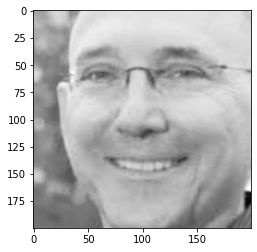

In [ ]:
Example(2211)

net_out:  tensor([1.0000e+00, 8.6043e-25], device='cuda:0')
net_out:  tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        5.6899e-34], device='cuda:0')
Predicted gender: Male, real gender:   Male
Predicted age: (55-65>,   real age: 65


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


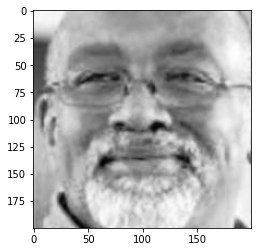

In [ ]:
Example(0)

net_out:  tensor([2.7910e-04, 9.9980e-01], device='cuda:0')
net_out:  tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.2071e-14,
        1.0000e+00], device='cuda:0')
Predicted gender: Female, real gender:   Female
Predicted age: (65-..,   real age: 85


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


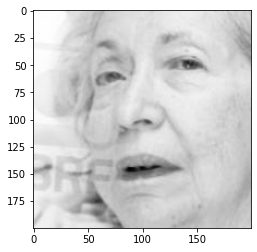

In [ ]:
Example(2)

net_out:  tensor([2.7775e-07, 1.0000e+00], device='cuda:0')
net_out:  tensor([0.0000e+00, 0.0000e+00, 4.7566e-39, 5.1848e-44, 2.1580e-43, 1.0000e+00,
        1.2588e-36], device='cuda:0')
Predicted gender: Female, real gender:   Female
Predicted age: (55-65>,   real age: 56


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


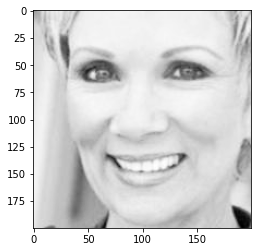

In [ ]:
Example(3333)